In [1]:
import cv2
import numpy as np
import pandas as pd
from data_parse import DataParser
from shirt_color import ShirtColor
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
directory = '../data/SoccerNetGS/gamestate-2024/test/'
data_parser = DataParser(directory)
df = data_parser.parse_data_to_df()

Wczytywanie danych...


100%|██████████| 50/50 [00:08<00:00,  5.62it/s]


Tworzenie DataFrame...


100%|██████████| 49/49 [00:03<00:00, 15.97it/s]


In [3]:
indexes = random.sample(list(df['image_id'].unique()), 500)

In [4]:
def get_predictions(crop_factor: float = 0.25):
    prediction_results = {}
    are_kits_saved = False
    for img_id in tqdm(indexes):
        img_path = f'../data/SoccerNetGS/gamestate-2024/test/SNGS-{img_id[1:4]}/img1/{img_id[-6:]}.jpg'
        frame = cv2.imread(img_path)
        shirts_data: pd.DataFrame = data_parser.get_shirts_data(img_id)
        shirts_data['x2'] = shirts_data['bbox_image_x'] + shirts_data['bbox_image_w']
        shirts_data['y2'] = shirts_data['bbox_image_y'] + shirts_data['bbox_image_h']
        b_boxes = [row for row in shirts_data[['bbox_image_x', 'bbox_image_y', 'x2', 'y2']].values]
        true_values = [1 if row == 'left' else 0 for row in shirts_data['attributes_team'].values]
        if len(b_boxes) > 1:
            shirt_color = ShirtColor(frame, b_boxes, true_values)
            shirt_color.set_crop_factor(crop_factor)
            accuracy = shirt_color.run_prediction_with_rgb()
            prediction_results[img_id] = accuracy
            if not are_kits_saved:
                shirt_color.plot_average_color(f'kits/kits_rgb_clustering_{crop_factor}.png')
                are_kits_saved = True
    return prediction_results

In [13]:
# Jako że to podział na 2 klasy, to accuracy jest zawsze większe niż 0.5, nie jestem w stanie zapewnić że to co w danych jest jako 1 też dostranie numer klasy równy 1 w kmeansie
acc = {}
for x in [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4]:
    prediction_results = get_predictions(x)
    prediction_results_mapped = {k: 1 - v if v < 0.5 else v for k, v in prediction_results.items()}
    avg_prediction = sum(prediction_results_mapped.values()) / len(prediction_results_mapped)
    acc[x] = avg_prediction
    print(f'Crop factor: {x}, avg prediction: {avg_prediction}')

100%|██████████| 500/500 [00:28<00:00, 17.40it/s]


Crop factor: 0.0, avg prediction: 0.9265212928274933


100%|██████████| 500/500 [00:28<00:00, 17.52it/s]


Crop factor: 0.1, avg prediction: 0.9394087036810557


100%|██████████| 500/500 [00:29<00:00, 17.03it/s]


Crop factor: 0.2, avg prediction: 0.9422169540978383


100%|██████████| 500/500 [00:29<00:00, 17.00it/s]


Crop factor: 0.25, avg prediction: 0.9424681368752484


100%|██████████| 500/500 [00:29<00:00, 17.00it/s]


Crop factor: 0.3, avg prediction: 0.9377048086552855


100%|██████████| 500/500 [00:28<00:00, 17.66it/s]


Crop factor: 0.35, avg prediction: 0.9297277284119392


100%|██████████| 500/500 [00:28<00:00, 17.54it/s]

Crop factor: 0.4, avg prediction: 0.9232331571835967


In [8]:
def get_grayscale_predictions(crop_factor: float = 0.25):
    prediction_results = {}
    are_kits_saved = False
    for img_id in tqdm(indexes):
        img_path = f'../data/SoccerNetGS/gamestate-2024/test/SNGS-{img_id[1:4]}/img1/{img_id[-6:]}.jpg'
        frame = cv2.imread(img_path)
        shirts_data: pd.DataFrame = data_parser.get_shirts_data(img_id)
        shirts_data['x2'] = shirts_data['bbox_image_x'] + shirts_data['bbox_image_w']
        shirts_data['y2'] = shirts_data['bbox_image_y'] + shirts_data['bbox_image_h']
        b_boxes = [row for row in shirts_data[['bbox_image_x', 'bbox_image_y', 'x2', 'y2']].values]
        true_values = [1 if row == 'left' else 0 for row in shirts_data['attributes_team'].values]
        if len(b_boxes) > 1:
            shirt_color = ShirtColor(frame, b_boxes, true_values)
            shirt_color.set_crop_factor(crop_factor)
            accuracy = shirt_color.run_prediction()
            prediction_results[img_id] = accuracy
            if not are_kits_saved:
                shirt_color.plot_average_color(f'kits/kits_grayscale_clustering_{crop_factor}.png')
                are_kits_saved = True
    return prediction_results

In [16]:
acc_grayscale = {}
for x in [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4]:
    prediction_results = get_grayscale_predictions(x)
    prediction_results_mapped = {k: 1 - v if v < 0.5 else v for k, v in prediction_results.items()}
    avg_prediction = sum(prediction_results_mapped.values()) / len(prediction_results_mapped)
    acc_grayscale[x] = avg_prediction
    print(f'Crop factor: {x}, avg prediction: {avg_prediction}')

100%|██████████| 500/500 [00:33<00:00, 15.06it/s]


Crop factor: 0.0, avg prediction: 0.8522743617925272


100%|██████████| 500/500 [00:31<00:00, 15.69it/s]


Crop factor: 0.1, avg prediction: 0.8733588931815957


100%|██████████| 500/500 [00:32<00:00, 15.52it/s]


Crop factor: 0.2, avg prediction: 0.8832910274280245


100%|██████████| 500/500 [00:30<00:00, 16.21it/s]


Crop factor: 0.25, avg prediction: 0.8846110581714146


100%|██████████| 500/500 [00:30<00:00, 16.50it/s]


Crop factor: 0.3, avg prediction: 0.8797332069215414


100%|██████████| 500/500 [00:29<00:00, 16.98it/s]


Crop factor: 0.35, avg prediction: 0.8691996085976171


100%|██████████| 500/500 [00:29<00:00, 17.10it/s]

Crop factor: 0.4, avg prediction: 0.8577603633823159


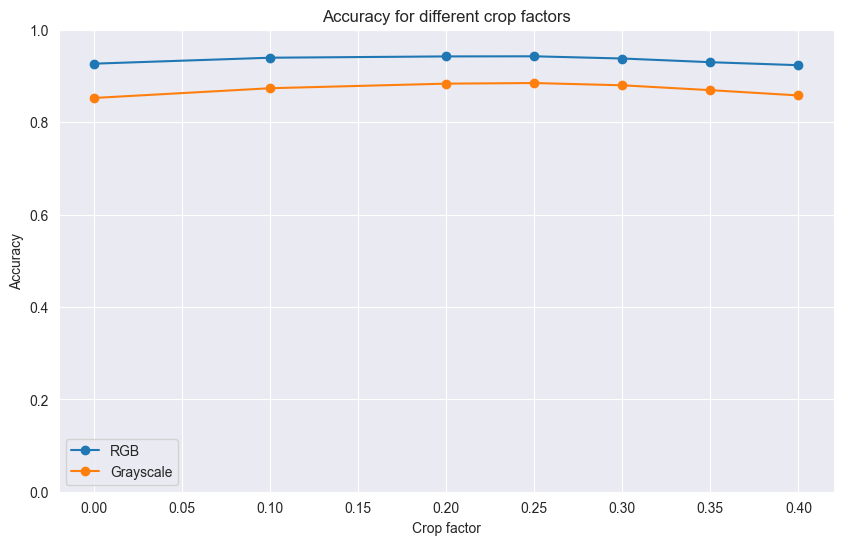

In [24]:
x = list(acc.keys())
y1 = list(acc.values())
y2 = list(acc_grayscale.values())
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='RGB', marker='o')
plt.plot(x, y2, label='Grayscale', marker='o')
plt.title('Accuracy for different crop factors')
plt.grid
plt.ylim(0, 1)
plt.xlabel('Crop factor')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Tak na prawe to można jeszcze ten wykres stestować dla innych przestrzeni barw i jak to wpłynie na accuracy

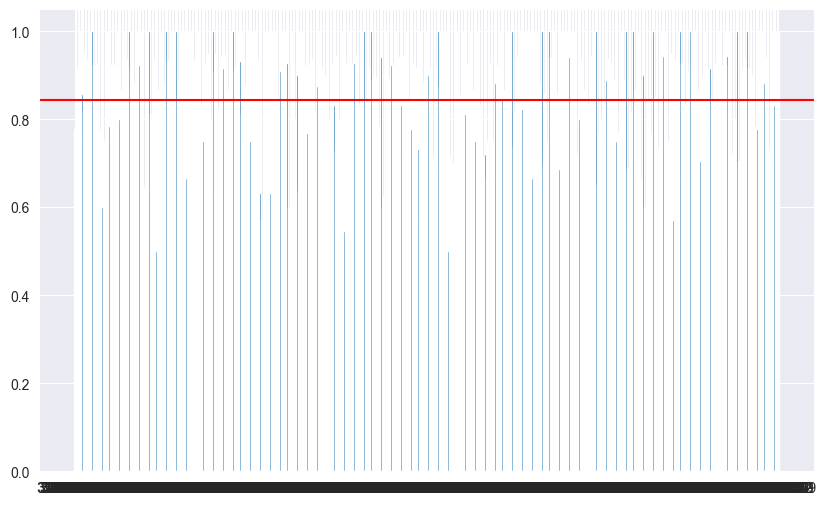

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(prediction_results_mapped.keys(), prediction_results_mapped.values())
plt.axhline(y=avg_prediction, color='r', linestyle='-')
plt.show()
